## Base de Python en Machine Learning fichier Data.csv

**Importer les librairies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


**Importer le dataset**

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [7]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

**Gerer les donnees manquantes**

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer.fit(X[:, 1:3])
X[:,1:3]= imputer.transform(X[:, 1:3])

In [28]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [29]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

**Gerer les variables categoriques**

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [31]:
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [32]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

**enlever relation relation d'ordre en creant colomnnes**

In [33]:
onehotencoder = OneHotEncoder(categorical_features = [0])

In [34]:
X = onehotencoder.fit_transform(X).toarray()

/home/anthelix/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/anthelix/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [35]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [36]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [37]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

**Diviser le data en train et testset**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**features scaling mettre a l'echelle**

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler() # creer un objet de la class standardScaler()
X_train = sc.fit_transform(X_train) # lier objet ala matrice de fatures du training set et la sclaer
X_test = sc.transform(X_test)

In [41]:
X_test

array([[-1.        ,  2.64575131, -0.77459667, -1.45882927, -0.90166297],
       [-1.        ,  2.64575131, -0.77459667,  1.98496442,  2.13981082]])

## REGRESSION LINEAIRE ## fichier Salary_Data.csv

y = b0 + b1 * X   =>  Salaire = b0 + b1 * Experience

**b0**=Constante **b1**=Coefficient **y**=variable_dependante(DV) **X**=variable_Indepndante(IV)

Methode des moindres carres ordinaires = minimise la somme des difference aux carres, une droite proche des ponits

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values     # variables independantes
y = dataset.iloc[:, -1].values      #variables dependantes

 pas de donnes manquantes dans ce dataset
 pas de variable scategoriques mais numerique continue

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1.0/3, random_state = 0)

pas de Feature scaling dans la regression lineaire car tout sera a la meme echelle du fait u coef

**Construction du modele**

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 **Faire de nouvelles predictions**

In [47]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [48]:
y_pred  = regressor.predict(X_test) # valeur des VI dont on peut predire la valeur des VD

In [49]:
y_pred # predictions a partir de valeurs dans le test set que nous avonc construit

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [50]:
regressor.predict([[15]])# predictions vous VIqui ne sont pas dans le X_dataset

array([167005.32889087])

 **Visulaliser les resultats**

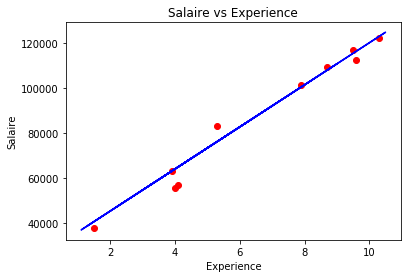

In [51]:
plt.scatter(X_test, y_test, color = 'red')   # placer des points
plt.plot(X_train, regressor.predict(X_train), color = 'blue') # tracer une droite, ordonnes regressor car on veut la predictio
plt.title('Salaire vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salaire')
plt.show()


## REGRESSIONS LINEAIRES MULTIPLES 

![Regression Lineaire Multiple](img/regression_VM.PNG)

Avant de faire de la regression lineaire verifie ces 5 hypotheses
    - Exogeneite
    - Homscedascicite  
    - Erreurs independantes
    - Normalite des erreurs
    - Non colinearite des variables independantes
    

y = b0 + b1X1 + b2X2 + b3X3 + ?? 
creer **dummy varaiables** quand les donnes ne sont pas numeriques en creant une colonne par dummy et en remplissant avec des 1 ou des 0
il faut ensuite enlever la colonne qui contenait mauvaise variables et la remplacer par les dummy Variables
enlever la colonne californie acar dependate des la comnne Newyork
si D1 vaut 0 --> californie et si 1 --> Newyork

![Dummy Variable](img/dummy_variable.PNG)

**Le piege des dummy Variables**

toujours omettre 1 dummy variable sur le nombre de dummy variables  totale.
si 9 valeurs dans etat en gardez que 8 
___

## CONSTRUIRE UN MODEL

se debarrasser de certaines variables independantes le + d'impact ou qui explique le mieux la VD
    - ne pas jeter trop de variables
    - expliquer en quoi les VI choisient predisent la VD

**5 methodes de construction de modeles**

"all in"

        : integrer toutes les variables independantes qu'on a, dans un modele de regression MultiLineaire
        : vous savez deja ce qu'il faut mettre comme VI (connaissance du sujet +++), etre certain des VI qui prediesent
        : vous n'avez pas le choix 
        : pour preparer la *Bacward Elimination*

  "Backward Elimination"

**:step 1** : choisir un seuil de significativite  SL pour rester dans le modele 9e.g SL = 0.05) 5%

**:step 2** : Remplir le modele de tous les predicteurs possibles (X)

**:step 3** : Considerer le predicteur ayant la plus grande p-value

                      si p-value > SL, aller au step 4, sinon c'est fini
**:step 4** : Enlevre le predicteur

**:step 5** : Ajuster lemodele sans cette cvariable
            retourner au step 3
            fini quand au step 3 on ne retrouve pas de p-value superieur au seuil de significativite
            le modele est pret

"Forward Selection"

**:step 1** : choisir un seuil de significativite  SL pour rester dans le modele 9e.g SL = 0.05) 5%

**:step 2** : ajuster tous les modeles de regression simples y ~ Xn
                    si VI = {X1, X2,..., Xn}, alors realisr les 'n' modeles de regression lineaire simple
                    ==> y = a1 + b1X1 puis y = a2 + b2X2 ...
                    une fois que les n modeles sont realises
                  selectionner la plus petite p_value
                  
**:step 3** : garder cette variable(X) et realiser  tous les modeles de regression multiples possibles avec un predicteur en plus qu'on ajoute aux predicteurs qu'on avait selectionner au step 2

si on a n {X1, .., Xn}, qu'on a mis une variables de cote au step 2
   donc on doit faire n-1 modeles de regression lineaire multiples coresspondant au n-1 VI qui restent
   
==> step 2, on a garde la variable qui a la plus petite p-value. 
==> step 3, on fait n-1 modele de regression lineaire double (2 VI) en ajoutant separement les n-1 variables qui restaient a votre variables electionne au step 2

**:step 4** :  on regarde les n-1 modele de regression double, prendre celui qui a la variable ajouter au step 3 qui a la plus petite p_value

==> au step 3 on a fait n-1 modele de regression lineaire double, avec les n-1 variables restantes. dans ces n-1 variables restantes, on regarde celle qui a la plus petite p_value dans le modele de regression lineire double 

si p < SL, aller au Step 3
==> quqnd on pend le predicteur qui a la plus petite p_value, ca donne un modele lineaire double. si la p_value de la  2eme predicteur est inferieur au seuil de significativite, alors au step on re-itere, on ajoute une nouelle variable au modele double qui devient un modele de regression triple, donc il resten-2 variables donccafait n-2 nouveau modele a realiser  
        jusqu'ua ce qu'au step 4, il n'y ait plus de  p_value inf au Seuil de significativite. si la plus petite p_value est superieur a SL, fin du modele. 
        modele composer du 1er predicteur trouve au step2, et de tous les predicteurs selectionner dans les boucles 3 et 4. Attention, le modele n'est pas celui avec le dernier predicteur ajoute au step 4 ajoute (+ petite P_value mais > a SL ) mais le precedent avec toutes les p_value inf a SL.


[p_value](https://freakonometrics.hypotheses.org/2462)     
[Backward Elimination](http://www.thejavageek.com/2018/02/14/backward-elimination-multiple-linear-regression/)      
[T-test using Python and Numpy](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f)    

"Bidirectionnal Elimination"

step1 : choisir 2 seuils de SL pour entrer(SLENTER) et rester(SLSTAY) dans le modele.

step2: effectuer le next step de la forward selection

step3: effectuer tous les steps de la backward elimination
            refaire la step2
            
step4: aucune nouvelle variables peut entrer et aucune ancienne variable peut sortir

"all Possible"

step1: choisir un critere de qualite d'ajustement, ex critere d"akaike
ste2: construire tous les modeles de regression possibles
step3: choisir celui ayant le meilleur critere

    

## REGRESSION LINEAIRE MULTIPLE implementation##

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
# Importer le dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [54]:
# Gerer les variables categoriques
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])


In [55]:
# enlever relation relation d'ordre en creant colomnnes
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] # enlever 1 colonne, piege des dummy variables

/home/anthelix/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/anthelix/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [56]:
# Diviser en training et test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
# construction du modele multiple

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
#  Faire de nouvelles predictions
y_pred  = regressor.predict(X_test) # valeur des VI dont on peut predire la valeur des VD

In [60]:
regressor.predict(np.array([[1, 0, 130000, 140000, 300000]]))# predictions vous VIqui ne sont pas dans le X_dataset


array([157732.46992718])

In [61]:
##REGRESSION POLYNOMIALE

1 seule variable independante a differente puissance
![reg. Poly 1](Reg.Poly1.png)
degre 2
non linearite approprie au pb non lineaire
tester les 2 regressions lineaire ou polynomiales pour savoir un un dataser en lineaire ou pas ex: epidemie, non lineaire. 


![typedereg](Type_regressions.png)

reg. poly est la meme que Lineaire multiple ET pour une seule VI

In [64]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
# Importer le dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [68]:
# construction du modele non lineaire
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

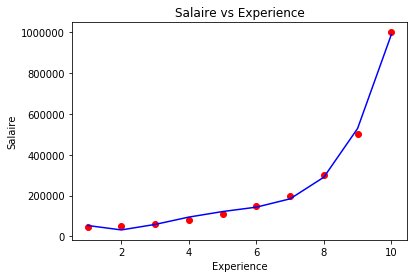

In [69]:
# visualiser les resultats
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X_poly), color = 'blue')
plt.title('Salaire vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salaire')
plt.show()

## le R^2##

![rappel de la regression lineaire simple](coef_de_det.png)

methode des carres ordinaires

![SSres](SSres.png)

![SStot](SStot.png)


![square](square.png)


plus R2 se rapproche de 1 plus la droite de regression lineaire se rapproche des points d'observation que la droite des moyennes.



R^2 Qualite de la prediction


![adju](adju.png)

## LA REGRESSION LOGISTIQUE

 p = 1/1 + e^-y ==> y = ln(p/1-p) et on a y = b0+ b1*x ==> ln(p/1-p) = b0+ b1*x

![regression logistique](RegLogistic.png)

a utilise quand on a predire une VS categoriq binaire dont le resultat st oui ou non

 ==> probabilite qu'une action se produise

p(chapeua) est la valeur predite de la valeur sous jacente par le modele 



In [25]:
# Regression logistique

# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
X

array([[15624510, 'Male', 19.0, 19000.0],
       [15810944, 'Male', 35.0, 20000.0],
       [15668575, 'Female', 26.0, 43000.0],
       ...,
       [15654296, 'Female', 50.0, 20000.0],
       [15755018, 'Male', 36.0, 33000.0],
       [15594041, 'Female', 49.0, 36000.0]], dtype=object)

In [28]:
# Supprimer ID et le genre car par d'impact sur l'achat ou pas de la voture. 

In [29]:
# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) # 

In [30]:
X = dataset.iloc[:, [2, 3]].values

In [31]:
X

array([[1.90e+01, 1.90e+04],
       [3.50e+01, 2.00e+04],
       [2.60e+01, 4.30e+04],
       [2.70e+01, 5.70e+04],
       [1.90e+01, 7.60e+04],
       [2.70e+01, 5.80e+04],
       [2.70e+01, 8.40e+04],
       [3.20e+01, 1.50e+05],
       [2.50e+01, 3.30e+04],
       [3.50e+01, 6.50e+04],
       [2.60e+01, 8.00e+04],
       [2.60e+01, 5.20e+04],
       [2.00e+01, 8.60e+04],
       [3.20e+01, 1.80e+04],
       [1.80e+01, 8.20e+04],
       [2.90e+01, 8.00e+04],
       [4.70e+01, 2.50e+04],
       [4.50e+01, 2.60e+04],
       [4.60e+01, 2.80e+04],
       [4.80e+01, 2.90e+04],
       [4.50e+01, 2.20e+04],
       [4.70e+01, 4.90e+04],
       [4.80e+01, 4.10e+04],
       [4.50e+01, 2.20e+04],
       [4.60e+01, 2.30e+04],
       [4.70e+01, 2.00e+04],
       [4.90e+01, 2.80e+04],
       [4.70e+01, 3.00e+04],
       [2.90e+01, 4.30e+04],
       [3.10e+01, 1.80e+04],
       [3.10e+01, 7.40e+04],
       [2.70e+01, 1.37e+05],
       [2.10e+01, 1.60e+04],
       [2.80e+01, 4.40e+04],
       [2.70e+

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [33]:
# pas de donnees manquantes
# pas de variables categoriques

In [34]:
# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) # 

In [35]:
# features scaling oui car pas combinaisons lineaire
# donc mettre les VI a la meme echelle

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [38]:
# construction du modele 
# regression logistique est un modele lineairedonc sk linear

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


/Users/schatagn/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
 # False Positives et neagatives

In [42]:
# Matrice de confusion


![conf](conf.png)

In [45]:
# Faire de nouvelles predictions
y_pred = classifier.predict(X_test)

In [48]:
# construction de la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[65,  3],
       [ 8, 24]])

In [50]:
# 65 n'achete pas le produit, 24 achete le produit, diagonale des "TRUE"
# a predit 8 fois incorretct que n'achete pas le produit, a predit 3 fois de facon incorretct que achete le produit

In [51]:
# calcul accuracy (65+24)/100 = 0.89

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


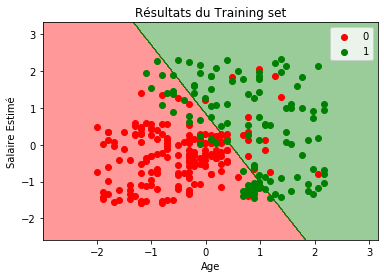

In [53]:
# Visualiser les résultats
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

In [54]:
# les points = observations relles ==> en rouge pas acheter, en vert acheter
# les regions = modele prdict ==> en vert le modele predit que achat, en rouge predit pas d'achat
# courbe de prediction entre les 2 zones = ligne droite car modele linear


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


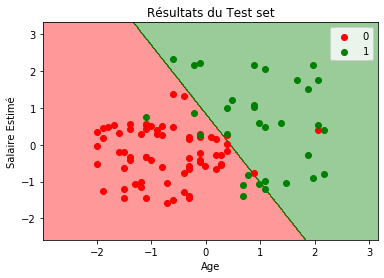

In [56]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Test set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

## SVM

frontier estre 2 groupes de points. Entre les 2 points differentes les plus proches, droite equidistant de la frontiere, et la distance de la droite aux points est maximales. La somme est appele la marge maximale
==> points = supports vectors
role des 2 points = caracterise le modele
Hyperplan de marge maximale: ds un plan a 2 dime = 1 droite, toujours n-1 dimensions
hyperplan positif et negatif ==> hyperplan passant par les points et parrallele a l'herplan de marge maximale

tres bons modele pour classer des elements en regardant les lements qui se ressemblent le pls
doivent pourvoir etre separe de facon lineaire
modele lineaire

In [59]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [61]:
# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [62]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
# Construction du modèle
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [67]:
# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)

In [68]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


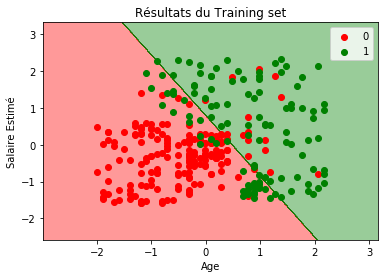

In [69]:
# Visualiser les résultats
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

SVM lineaire pas adapte a nos donnees, car ligne droite. besoin d'une ligne courbe pour bien separe

 ## KERNEL SVM

-- espace + grd dimension

creer un espace de plus grande dimension. 
par une foncrtion f = x -5 ==> decaler les points pour se retrouver avec un groupe d'un cote du zero et 2 autres groupes d'un cote
puis par une fonction f = (x - 5)^2 projeter les points sur une courbe  ==> on passe de un plan a deux plans
donc devient separable par une ligne droite

dans un plan en 3D, despoints sont separables par un plan en 2D

puis les projeter a nouveau vers notre espace originel en 2D ==> demande bcq de calculs

SOLUTION KERNEL

e puissance qqch negatif ==> plus qqch de grand, plus e sera petit, plus K(x,l) sera proche de zero. 

e puissance 0 == 1 donc plus x sera proche de l, plus altitude ugmente car e puissance 0 == 1 , k(x, l) ==1

pour determiner le centre du kernel: on positionne le Landmark(l) au millieu des points verts,  
on projette ensuite ts les points grace a la fonction Kernels.
on prend la limite de la base proche de 1 pour separer les points.
a l'exterieur, k(x, l) vaut zero a l'interieur vaut 1
role de sigma : agrandir la base de la montagne


![kernel](kernel.png)

 possible de prendre 2 landmark et 2 sigmam differrente
![kernelMulti](kernelMulti.png)

evite le mappage et calcul trop gourmands, separer par une frontiere simples des points non lineaire, 
non separable de facon lineaore 

-- autres kernel

![kernelDivers](kernelDivers.png)

## Kernel SVM

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


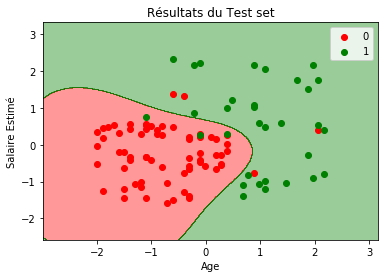

In [2]:
# Kernel SVM

# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Construction du modèle
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualiser les résultats
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Test set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

## CAP Cumulative Accuracy Profile

overfitting entre 90% et 100%, trop appris ou facteur detreminant 


![analyseCAP](analyseCAP.png)

## K-MEANS INTUITION


pas de VD. K-means observe des clusters de points d'observation

step1: choisir le nombre K de clusters
step2: Selectionner les centroids 